# **LSTM Dry Ginger**

In [ ]:
# !pip install scikit-learn==0.24

In [ ]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pre
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
# importing data
data_dg = pd.read_csv("/content/dry ginger 2008-2020.csv")
data_dg.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,Alappuzha,2008,161,353,1490.74,24.95,33.98,31.14,0.39,8.29,6.27,2.19
1,Alappuzha,2009,66,163,1482.52,24.95,36.98,32.73,0.38,8.52,6.07,2.47
2,Alappuzha,2010,87,264,1654.09,24.95,40.97,34.84,0.47,7.88,5.62,3.02
3,Alappuzha,2011,94,172,1570.87,23.95,38.98,33.25,0.42,7.89,5.56,1.83
4,Alappuzha,2012,125,220,1657.17,25.94,37.98,33.78,0.42,8.19,6.04,1.76


In [ ]:
data_dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                181 non-null    object 
 1   YEAR                    181 non-null    int64  
 2   AREA                    181 non-null    int64  
 3   PRODUCTION              181 non-null    int64  
 4   AVERAGE RAINFALL        181 non-null    float64
 5   MINIMUM TEMPERATURE     181 non-null    float64
 6   MAXIMUM TEMPERATURE     181 non-null    float64
 7   AVERAGE TEMPERATURE     181 non-null    float64
 8   RELATIVE SOIL MOISTURE  181 non-null    float64
 9   AVERAGE WINDSPEED       181 non-null    float64
 10  pH                      181 non-null    float64
 11  YIELD                   181 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 17.1+ KB


In [ ]:
le=pre.LabelEncoder()
cat_df_dg=data_dg.select_dtypes(exclude=[float,int])
for x in cat_df_dg.columns:
    data_dg[x]=le.fit_transform(data_dg[x])


data_dg.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0,2008,161,353,1490.74,24.95,33.98,31.14,0.39,8.29,6.27,2.19
1,0,2009,66,163,1482.52,24.95,36.98,32.73,0.38,8.52,6.07,2.47
2,0,2010,87,264,1654.09,24.95,40.97,34.84,0.47,7.88,5.62,3.02
3,0,2011,94,172,1570.87,23.95,38.98,33.25,0.42,7.89,5.56,1.83
4,0,2012,125,220,1657.17,25.94,37.98,33.78,0.42,8.19,6.04,1.76


In [ ]:
scaled_df = pre.minmax_scale(data_dg.values)

In [ ]:
df_Norm = pd.DataFrame(data = scaled_df, columns = data_dg.columns.to_list())

In [ ]:
df_Norm.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0.0,0.000000,0.019857,0.007559,0.384947,0.750209,0.400267,0.541436,0.619048,0.461735,0.72,0.109817
1,0.0,0.083333,0.006757,0.002657,0.380645,0.750209,0.600400,0.666930,0.571429,0.491071,0.52,0.156406
2,0.0,0.166667,0.009653,0.005263,0.470428,0.750209,0.866578,0.833465,1.000000,0.409439,0.07,0.247920
3,0.0,0.250000,0.010618,0.002889,0.426879,0.666667,0.733823,0.707972,0.761905,0.410714,0.01,0.049917
4,0.0,0.333333,0.014892,0.004128,0.472040,0.832916,0.667111,0.749803,0.761905,0.448980,0.49,0.038270


In [ ]:
X=df_Norm.drop(['YIELD'], axis=1)
Y=df_Norm["YIELD"]
X

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH
0,0.000000,0.000000,0.019857,0.007559,0.384947,0.750209,0.400267,0.541436,0.619048,0.461735,0.72
1,0.000000,0.083333,0.006757,0.002657,0.380645,0.750209,0.600400,0.666930,0.571429,0.491071,0.52
2,0.000000,0.166667,0.009653,0.005263,0.470428,0.750209,0.866578,0.833465,1.000000,0.409439,0.07
3,0.000000,0.250000,0.010618,0.002889,0.426879,0.666667,0.733823,0.707972,0.761905,0.410714,0.01
4,0.000000,0.333333,0.014892,0.004128,0.472040,0.832916,0.667111,0.749803,0.761905,0.448980,0.49
...,...,...,...,...,...,...,...,...,...,...,...
176,0.307692,0.750000,0.000689,0.000439,0.020969,0.666667,0.600400,0.625099,0.714286,0.608418,0.00
177,0.307692,0.833333,0.003999,0.003147,0.051613,0.750209,0.799867,0.791634,0.095238,0.698980,0.96
178,0.307692,0.916667,0.016823,0.009906,0.062901,0.499582,0.600400,0.541436,0.571429,0.661990,0.92
179,0.307692,1.000000,0.011997,0.007223,0.066664,0.583124,0.600400,0.583268,0.714286,0.656888,0.60


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=21311)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(126, 1, 11) (126,) (55, 1, 11) (55,)


In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(activation = "sigmoid", units=50, dropout = 0.10, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, dropout = 0.10, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(activation = "sigmoid", units=50, dropout = 0.10, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(activation = "tanh", units=50, dropout = 0.10))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the LSTM
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.summary()
history=regressor.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=150,shuffle=False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 50)             12400     
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_5 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_6 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_6 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

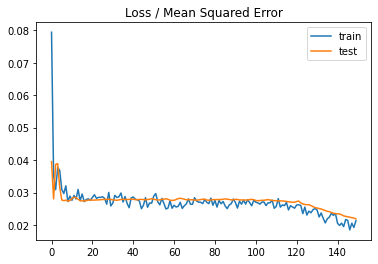

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make predictions
trainPredict = regressor.predict(X_train)
testPredict = regressor.predict(X_test)

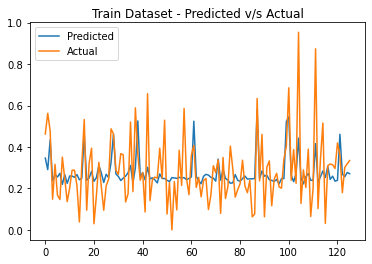

In [ ]:
plt.title('Train Dataset - Predicted v/s Actual')
plt.plot(trainPredict , label='Predicted')
plt.plot(y_train, label='Actual')
plt.legend()
plt.show()

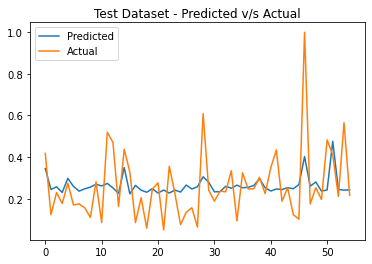

In [ ]:
plt.title('Test Dataset - Predicted v/s Actual')
plt.plot(testPredict , label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

In [ ]:
#Mean Absolute Error
mae_train = mean_absolute_error(y_train, trainPredict)
mae_test = mean_absolute_error(y_test, testPredict)
print('MAE Train: %.3f'% (mae_train))
print('MAE Test: %.3f'% (mae_test))
#Root Mean Squared Error
rmse_train = mean_squared_error(y_train, trainPredict, squared=False)
rmse_test = mean_squared_error(y_test, testPredict, squared=False)
print('RMSE Train: %.3f'% (rmse_train))
print('RMSE Test: %.3f'% (rmse_test))
#Mean Absolute Percentage Error
mp_train = mean_absolute_percentage_error(trainPredict,y_train)
mp_test = mean_absolute_percentage_error(testPredict,y_test)
print('MAPE Train: %.3f'% (mp_train))
print('MAPE Test: %.3f'% (mp_test))

MAE Train: 0.099
MAE Test: 0.106
RMSE Train: 0.132
RMSE Test: 0.148
MAPE Train: 0.360
MAPE Test: 0.400


# **Black Pepper**

In [ ]:
data_bp = pd.read_csv("/content/black pepper 2008-2020.csv")

In [ ]:
le=pre.LabelEncoder()
cat_df_bp=data_bp.select_dtypes(exclude=[float,int])
for x in cat_df_bp.columns:
    data_bp[x]=le.fit_transform(data_bp[x])


data_bp.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0,2008,2028,256,1451.29,24.29,33.01,29.5,0.184,8.29,6.6,0.13
1,0,2009,1943,242,1443.29,24.29,35.93,31.0,0.106,8.52,6.2,0.12
2,0,2010,2134,297,1610.32,24.29,39.81,33.0,0.330,7.88,6.0,0.14
3,0,2011,1940,174,1529.31,23.31,37.87,31.5,0.112,7.89,5.9,0.09
4,0,2012,1997,167,1613.32,25.26,36.90,32.0,0.106,8.19,6.0,0.08


In [ ]:
scaled_df_bp = pre.minmax_scale(data_bp.values)
df_Norm_bp = pd.DataFrame(data = scaled_df_bp, columns = data_bp.columns.to_list())
df_Norm_bp.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0.0,0.000000,0.015055,0.002503,0.384945,0.750429,0.399725,0.541667,0.228070,0.461735,1.000000,0.092593
1,0.0,0.083333,0.014073,0.002233,0.380645,0.750429,0.600275,0.666667,0.000000,0.491071,0.666667,0.074074
2,0.0,0.166667,0.016280,0.003292,0.470428,0.750429,0.866758,0.833333,0.654971,0.409439,0.500000,0.111111
3,0.0,0.250000,0.014038,0.000924,0.426883,0.666381,0.733516,0.708333,0.017544,0.410714,0.416667,0.018519
4,0.0,0.333333,0.014697,0.000789,0.472041,0.833619,0.666896,0.750000,0.000000,0.448980,0.500000,0.000000


In [ ]:
X_bp=df_Norm_bp.drop(['YIELD'], axis=1)
Y_bp=df_Norm_bp["YIELD"]

In [ ]:
X_train_bp,X_test_bp,y_train_bp,y_test_bp=train_test_split(X_bp,Y_bp,train_size=0.7,random_state=21311)

In [ ]:
X_train_bp, y_train_bp = np.array(X_train_bp), np.array(y_train_bp)
X_test_bp, y_test_bp = np.array(X_test_bp), np.array(y_test_bp)
X_train_bp = X_train_bp.reshape((X_train_bp.shape[0], 1, X_train_bp.shape[1]))
X_test_bp = X_test_bp.reshape((X_test_bp.shape[0], 1, X_test_bp.shape[1]))
print(X_train_bp.shape, y_train_bp.shape, X_test_bp.shape, y_test_bp.shape)

(118, 1, 11) (118,) (51, 1, 11) (51,)


In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(activation = "sigmoid", units=50, dropout = 0.10, return_sequences=True, input_shape = (X_train_bp.shape[1], X_train_bp.shape[2])))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, dropout = 0.10, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(activation = "sigmoid", units=50, dropout = 0.10, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(activation = "tanh", units=50, dropout = 0.10))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the LSTM
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.summary()
history_bp=regressor.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=150,shuffle=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 50)             12400     
                                                                 
 dropout_12 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_13 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_13 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_14 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_14 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_15 (LSTM)              (None, 50)               

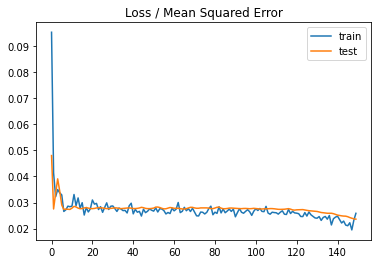

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history_bp.history['loss'], label='train')
plt.plot(history_bp.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make predictions
trainPredict_bp = regressor.predict(X_train_bp)
testPredict_bp = regressor.predict(X_test_bp)

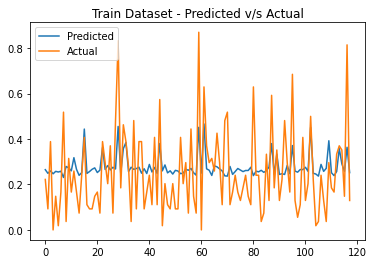

In [ ]:
plt.title('Train Dataset - Predicted v/s Actual')
plt.plot(trainPredict_bp , label='Predicted')
plt.plot(y_train_bp, label='Actual')
plt.legend()
plt.show()

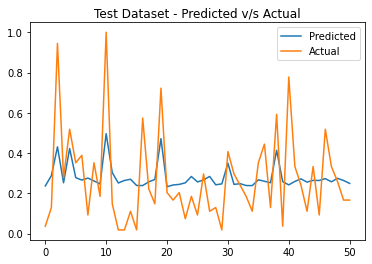

In [ ]:
plt.title('Test Dataset - Predicted v/s Actual')
plt.plot(testPredict_bp , label='Predicted')
plt.plot(y_test_bp, label='Actual')
plt.legend()
plt.show()

In [ ]:
#Mean Absolute Error
mae_train_bp = mean_absolute_error(y_train_bp, trainPredict_bp)
mae_test_bp = mean_absolute_error(y_test_bp, testPredict_bp)
print('MAE Train: %.3f'% (mae_train_bp))
print('MAE Test: %.3f'% (mae_test_bp))
#Root Mean Squared Error
rmse_train_bp = mean_squared_error(y_train_bp, trainPredict_bp, squared=False)
rmse_test_bp = mean_squared_error(y_test_bp, testPredict_bp, squared=False)
print('RMSE Train: %.3f'% (rmse_train_bp))
print('RMSE Test: %.3f'% (rmse_test_bp))
#Mean Absolute Percentage Error
mp_train = mean_absolute_percentage_error(trainPredict,y_train)
mp_test = mean_absolute_percentage_error(testPredict,y_test)
print('MAPE Train: %.3f'% (mp_train))
print('MAPE Test: %.3f'% (mp_test))

MAE Train: 0.132
MAE Test: 0.148
RMSE Train: 0.159
RMSE Test: 0.189
MAPE Train: 0.360
MAPE Test: 0.400


# **Turmeric**

In [ ]:
data_tm = pd.read_csv("/content/turmeric 2008-2020.csv")

In [ ]:
le=pre.LabelEncoder()
cat_df_tm=data_tm.select_dtypes(exclude=[float,int])
for x in cat_df_tm.columns:
    data_tm[x]=le.fit_transform(data_tm[x])


data_tm.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0,2008,11,13,1473.06,24.65,33.51,30.53,0.22,8.29,6.28,1.18
1,0,2009,20,21,1464.94,24.65,36.47,32.09,0.30,8.52,4.89,1.05
2,0,2010,15,20,1634.48,24.65,40.41,34.16,0.36,7.88,5.38,1.33
3,0,2011,12,21,1552.25,23.66,38.44,32.60,0.33,7.89,5.46,1.75
4,0,2012,11,12,1637.52,25.64,37.45,33.12,0.32,8.19,5.64,1.09


In [ ]:
scaled_df_tm = pre.minmax_scale(data_tm.values)
df_Norm_tm = pd.DataFrame(data = scaled_df_tm, columns = data_tm.columns.to_list())
df_Norm_tm.head()

,DISTRICT,YEAR,AREA,PRODUCTION,AVERAGE RAINFALL,MINIMUM TEMPERATURE,MAXIMUM TEMPERATURE,AVERAGE TEMPERATURE,RELATIVE SOIL MOISTURE,AVERAGE WINDSPEED,pH,YIELD
0,0.0,0.000000,0.003148,0.002083,0.384948,0.749789,0.399865,0.541063,0.1250,0.461735,0.515254,0.106007
1,0.0,0.083333,0.012592,0.004859,0.380648,0.749789,0.600135,0.666667,0.6250,0.491071,0.044068,0.060071
2,0.0,0.166667,0.007345,0.004512,0.470433,0.749789,0.866712,0.833333,1.0000,0.409439,0.210169,0.159011
3,0.0,0.250000,0.004197,0.004859,0.426886,0.666103,0.733424,0.707729,0.8125,0.410714,0.237288,0.307420
4,0.0,0.333333,0.003148,0.001736,0.472043,0.833474,0.666441,0.749597,0.7500,0.448980,0.298305,0.074205


In [ ]:
X_tm=df_Norm_tm.drop(['YIELD'], axis=1)
Y_tm=df_Norm_tm["YIELD"]

In [ ]:
X_train_tm,X_test_tm,y_train_tm,y_test_tm=train_test_split(X_tm,Y_tm,train_size=0.7,random_state=21311)

In [ ]:
X_train_tm, y_train_tm = np.array(X_train_tm), np.array(y_train_tm)
X_test_tm, y_test_tm = np.array(X_test_tm), np.array(y_test_tm)
X_train_tm = X_train_tm.reshape((X_train_tm.shape[0], 1, X_train_tm.shape[1]))
X_test_tm = X_test_tm.reshape((X_test_tm.shape[0], 1, X_test_tm.shape[1]))
print(X_train_tm.shape, y_train_tm.shape, X_test_tm.shape, y_test_tm.shape)

(126, 1, 11) (126,) (55, 1, 11) (55,)


In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(activation = "sigmoid", units=50, dropout = 0.10, return_sequences=True, input_shape = (X_train_tm.shape[1], X_train_tm.shape[2])))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, dropout = 0.10, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(activation = "sigmoid", units=50, dropout = 0.10, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(activation = "tanh", units=50, dropout = 0.10))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the LSTM
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.summary()
history_tm=regressor.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=150,shuffle=False)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 1, 50)             12400     
                                                                 
 dropout_24 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_25 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_25 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_26 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_26 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_27 (LSTM)              (None, 50)               

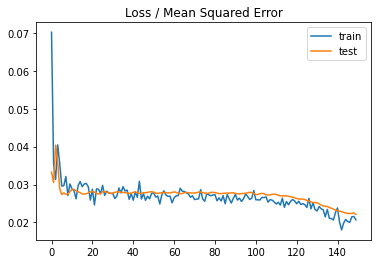

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history_tm.history['loss'], label='train')
plt.plot(history_tm.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make predictions
trainPredict_tm = regressor.predict(X_train_tm)
testPredict_tm = regressor.predict(X_test_tm)

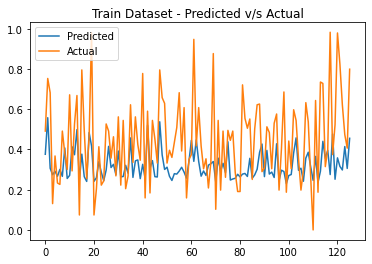

In [ ]:
plt.title('Train Dataset - Predicted v/s Actual')
plt.plot(trainPredict_tm , label='Predicted')
plt.plot(y_train_tm, label='Actual')
plt.legend()
plt.show()

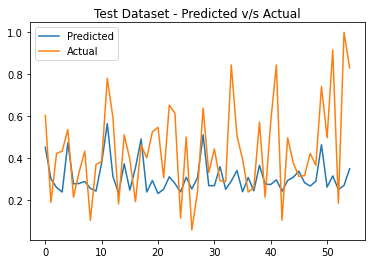

In [ ]:
plt.title('Test Dataset - Predicted v/s Actual')
plt.plot(testPredict_tm , label='Predicted')
plt.plot(y_test_tm, label='Actual')
plt.legend()
plt.show()

In [ ]:
#Mean Absolute Error
mae_train_tm = mean_absolute_error(y_train_tm, trainPredict_tm)
mae_test_tm = mean_absolute_error(y_test_tm, testPredict_tm)
print('MAE Train: %.3f'% (mae_train_tm))
print('MAE Test: %.3f'% (mae_test_tm))
#Root Mean Squared Error
rmse_train_tm = mean_squared_error(y_train_tm, trainPredict_tm, squared=False)
rmse_test_tm = mean_squared_error(y_test_tm, testPredict_tm, squared=False)
print('RMSE Train: %.3f'% (rmse_train_tm))
print('RMSE Test: %.3f'% (rmse_test_tm))
#Mean Absolute Percentage Error
mp_train = mean_absolute_percentage_error(trainPredict,y_train)
mp_test = mean_absolute_percentage_error(testPredict,y_test)
print('MAPE Train: %.3f'% (mp_train))
print('MAPE Test: %.3f'% (mp_test))

MAE Train: 0.171
MAE Test: 0.180
RMSE Train: 0.225
RMSE Test: 0.236
MAPE Train: 0.360
MAPE Test: 0.400
